## Synthetic Image Generation examples ##
In this Notebook a number of test cases using the PIV sythetic image generator will be presented.

The three examples shown are:
1. Using a fully synthetic flow field created by a random equation
2. Using pre attained experimental data
3. Using flow simulation results

In each of these cases the pattern to recieving the synthetic images is the same. The part that mostly varies is the data passed.

1. Data is either syntheticly made or pass to the create_synimage_parameters function.
2. The parameters for both images (frame_a, frame_b) are created
3. The parameters are passed to the generate_particle_image function in order to create the image representation.
4. Finally the images are shown on the screen as grayschale images.

In [1]:
from openpiv import synimagegen
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

### Example 1: synthetic flow field created by a random equation ###
In this case no data is passed to the function, so a random equation is invoked from the cff module. (line 46,52 in synimagegen.py)

This equation defines the velocities U,V for each point in the X,Y plane.

This equation is ment to be changed to suit the testing needs of each users system.


In [2]:
(
    ground_truth,
    cv,
    x_1,
    y_1,
    U_par,
    V_par,
    par_diam1,
    par_int1,
    x_2,
    y_2,
    par_diam2,
    par_int2,
) = synimagegen.create_synimage_parameters(None, [0, 1], [0, 1], [256, 256], dt=0.0025)


Requested pair loss: 10  Actual pair loss: 11


In [3]:
frame_a = synimagegen.generate_particle_image(
    256, 256, x_1, y_1, par_diam1, par_int1, 16
)
frame_b = synimagegen.generate_particle_image(
    256, 256, x_2, y_2, par_diam2, par_int2, 16
)

Text(0.5, 1.0, 'frame_b')

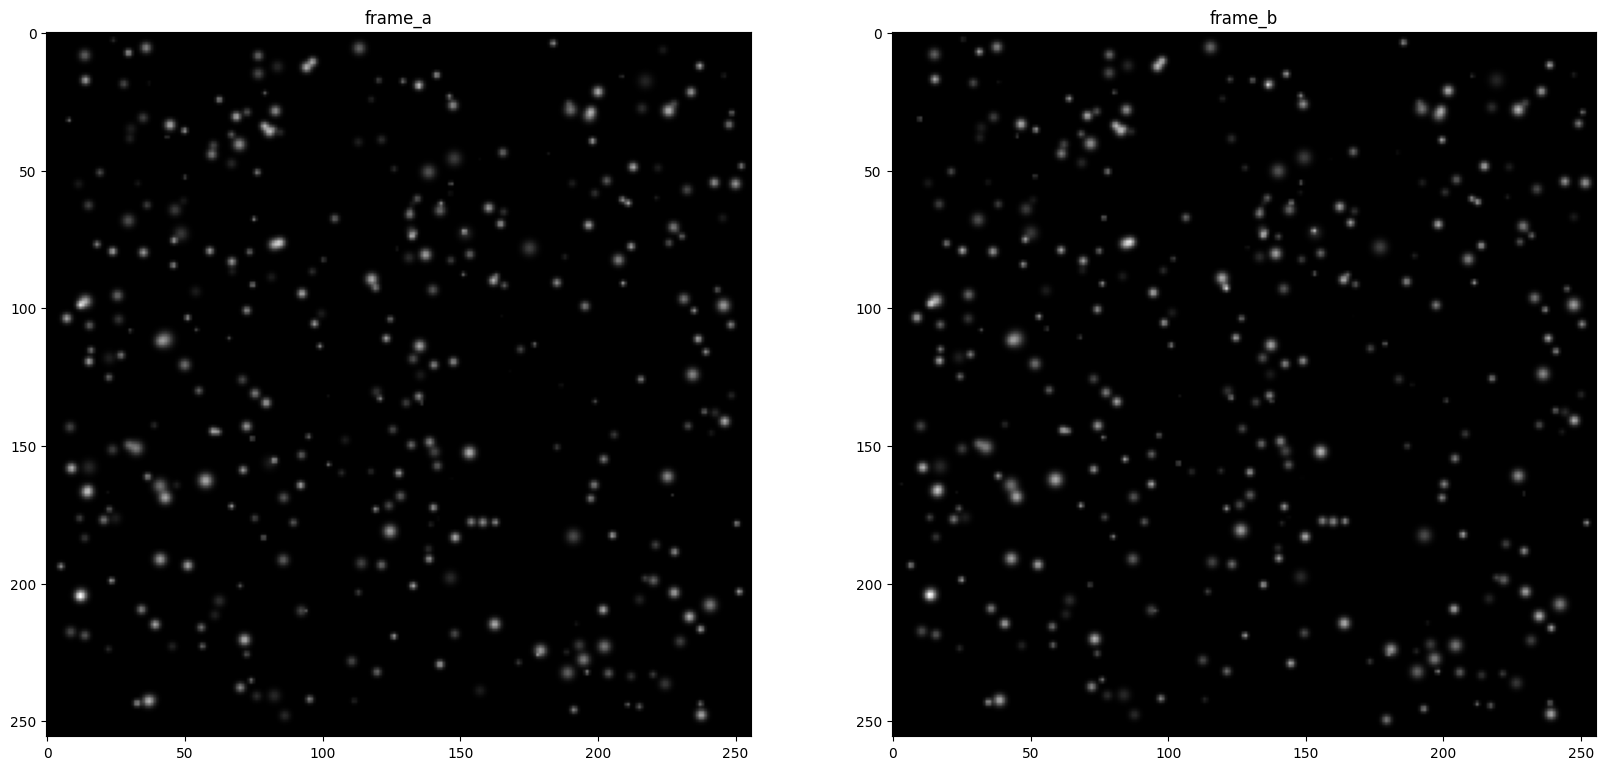

In [4]:
fig = plt.figure(figsize=(20, 10))
a = fig.add_subplot(
    1,
    2,
    1,
)
imgplot = plt.imshow(frame_a, cmap="gray")
a.set_title("frame_a")
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(frame_b, cmap="gray")
a.set_title("frame_b")


### Example 2: pre attained experimental data ###
In this case experiment data is passed to the function, and the interpolation flag is enabled. Thus using the data to create a continous flow field by interpolation and then using the field to create the paramters.

In [5]:
import pkg_resources

data = np.load(
    pkg_resources.resource_filename("openpiv", "/data/PIV_experiment_data.npz")
)


In [6]:
data = np.stack([data["X"], data["Y"], data["U"], data["V"]], axis=2)


In [7]:
(
    ground_truth,
    cv,
    x_1,
    y_1,
    U_par,
    V_par,
    par_diam1,
    par_int1,
    x_2,
    y_2,
    par_diam2,
    par_int2,
) = synimagegen.create_synimage_parameters(
    data, [0, 1], [0, 1], [256, 256], inter=True, dt=0.0025
)


Requested pair loss: 10  Actual pair loss: 11


/home/user/mambaforge/envs/openpiv/lib/python3.11/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=4,4 m=256 fp=67208.139125 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
/home/user/mambaforge/envs/openpiv/lib/python3.11/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=4,4 m=256 fp=120693.580633 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


In [8]:
frame_a = synimagegen.generate_particle_image(
    256, 256, x_1, y_1, par_diam1, par_int1, 16
)
frame_b = synimagegen.generate_particle_image(
    256, 256, x_2, y_2, par_diam2, par_int2, 16
)


Text(0.5, 1.0, 'frame_b')

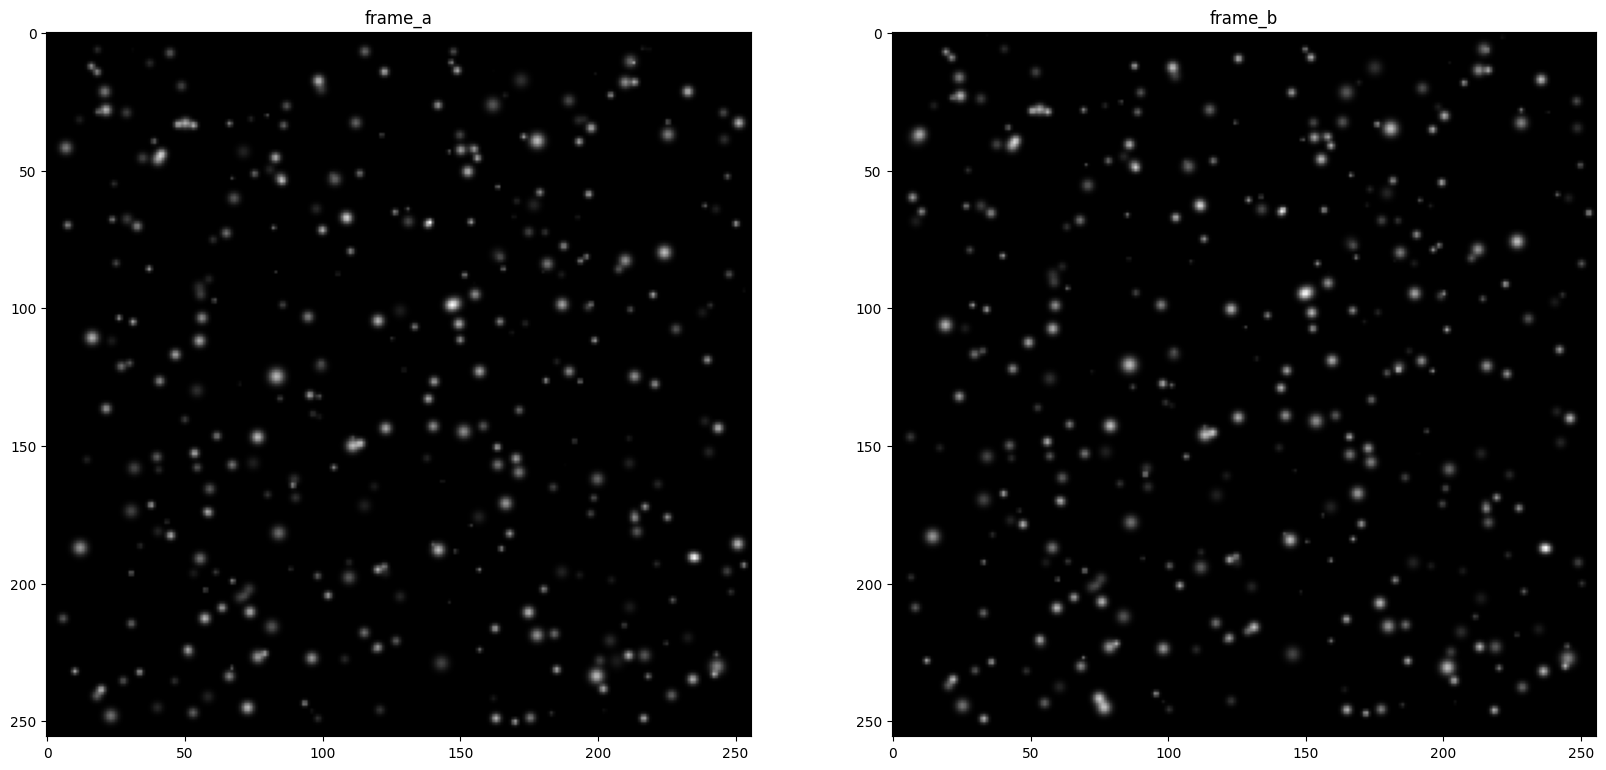

In [9]:
fig = plt.figure(figsize=(20, 10))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(frame_a, cmap="gray")
a.set_title("frame_a")
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(frame_b, cmap="gray")
a.set_title("frame_b")


### Example 3: flow simulation results ###
In this case flow simulation results are passed to the function, in the form of a tab-delimited text file.
The file is parsed and the data is used in order to continous flow field by interpolation.


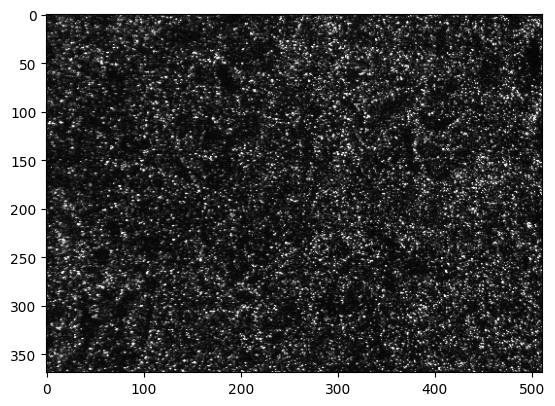

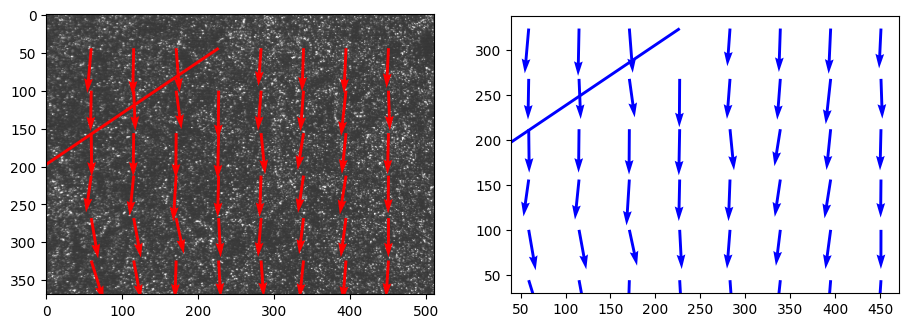

/home/user/mambaforge/envs/openpiv/lib/python3.11/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


TypeError: _stack_dispatcher() got multiple values for argument 'axis'

In [10]:
# use OpenPIV own demo to create velocity field 
# and create a synthetic images that use the same 
# velocity field - a loophole
from openpiv import piv, tools
x,y,u,v = piv.piv_example()

data = np.stack([x,y,u,v],axis=2)

In [ ]:
(
    ground_truth,
    cv,
    x_1,
    y_1,
    U_par,
    V_par,
    par_diam1,
    par_int1,
    x_2,
    y_2,
    par_diam2,
    par_int2,
) = synimagegen.create_synimage_parameters(
    data, [0, 1], [0, 1], [256, 256], inter=False, dt=0.0025
)


In [ ]:
frame_a = synimagegen.generate_particle_image(
    256, 256, x_1, y_1, par_diam1, par_int1, 16
)
frame_b = synimagegen.generate_particle_image(
    256, 256, x_2, y_2, par_diam2, par_int2, 16
)


In [ ]:
fig = plt.figure(figsize=(20, 10))
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(frame_a, cmap="gray")
a.set_title("frame_a")
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(frame_b, cmap="gray")
a.set_title("frame_b")


In [ ]:
x1,y1,u1,v1,s2n1 =  piv.simple_piv(frame_a, frame_b)